In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Load data

In [11]:
from sklearn.datasets import load_breast_cancer  
dataset = load_breast_cancer()

#### Explore data

In [9]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(dataset.DESCR)

In [ ]:
dataset.target_names

In [ ]:
# 0 = malignant
# 1 = benign

dataset.target

In [ ]:
dataset.data

In [28]:
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['benign'] = dataset.target

In [46]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

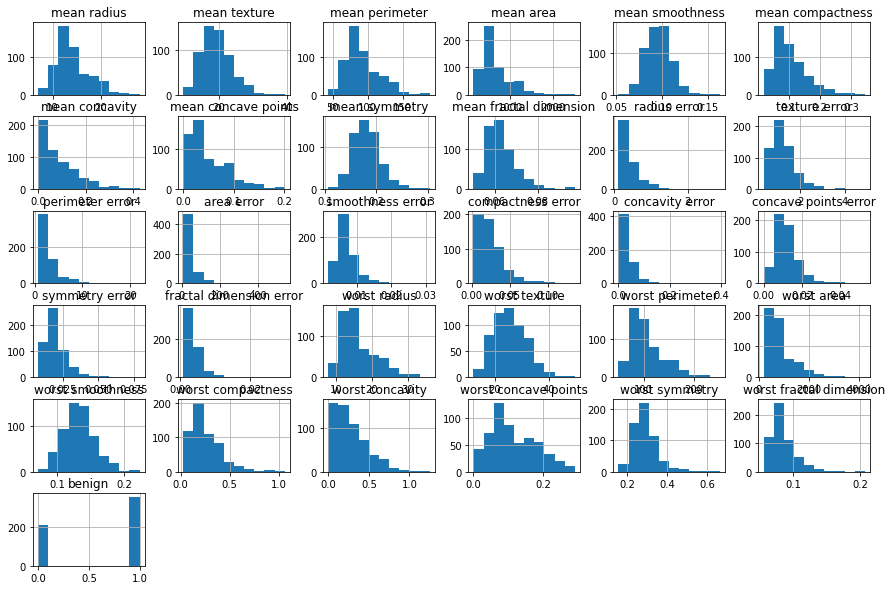

In [44]:
df.hist(figsize=(15,10))
plt.show()

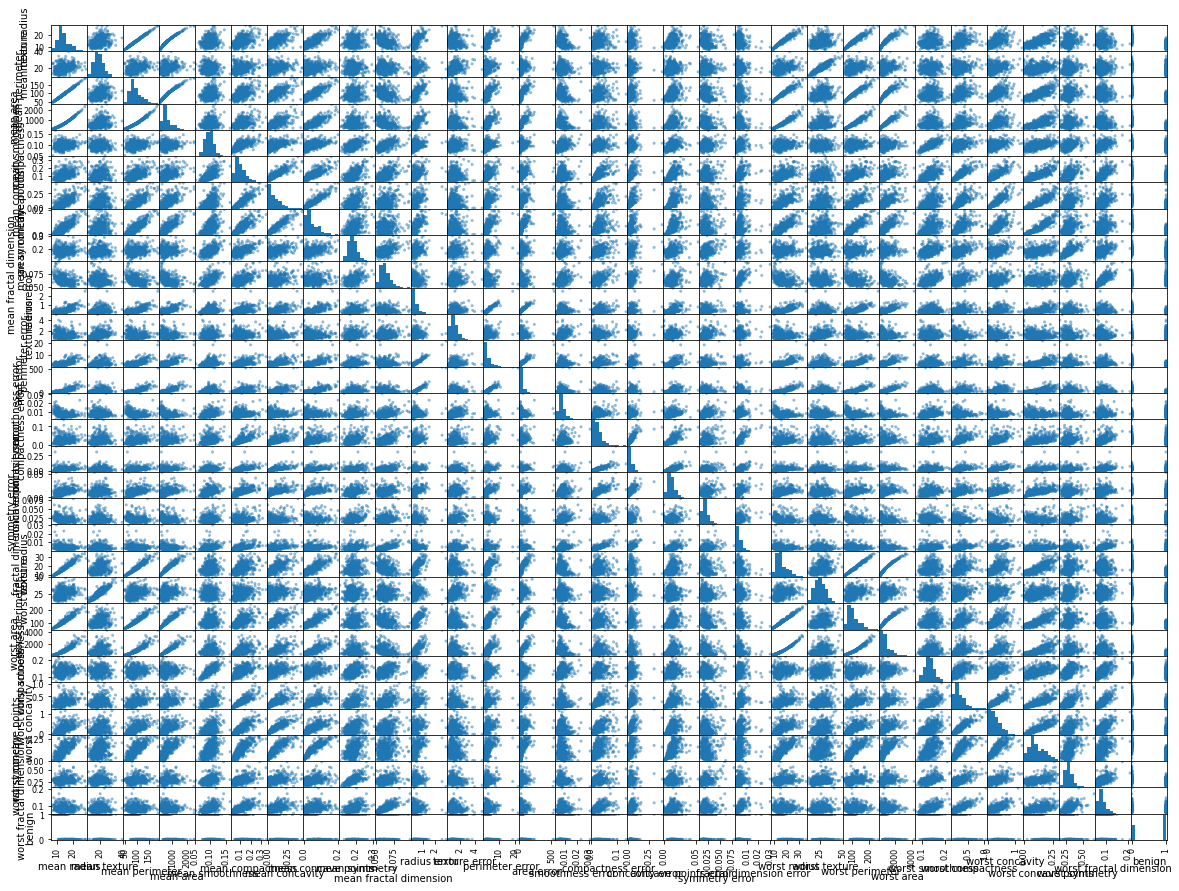

In [48]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(20,15))
plt.show()

#### **Feature scaling**

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset.data)  
X_scaled = scaler.transform(dataset.data)

In [40]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

#### **PCA (Principal Component Analysis)**
PCA is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated). 

Drawback of PCA is it’s almost impossible to tell how the initial features (here 30 features) combined to form the principal components. Note that PCA is an unsupervised method, meaning that it does not make use of any labels in the computation.

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) 
#let's check the shape of X_pca array
print(X_pca.shape)

(569, 3)


Can we choose *n_components = 2*?

You can check by measuring the variance ratio of the principal components.





In [50]:
ex_variance = np.var(X_pca, axis=0)  
ex_variance_ratio = ex_variance/np.sum(ex_variance)  
print(ex_variance_ratio)   

[0.60950217 0.2611802  0.12931763]


So here you can see that the first 2 components contributes to 87% of the total variance. So it’s good enough to choose only 2 components.

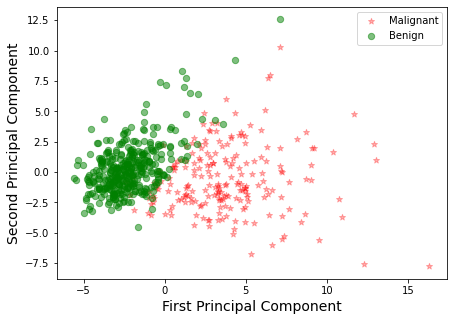

In [51]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]

labels=dataset.target
cdict={0:'red', 1:'green'}
labl={0:'Malignant', 1:'Benign'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ix=np.where(labels==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

These principal components are calculated only from features and no information from classes are considered. So PCA is unsupervised method and it’s difficult to interpret the two axes as they are some complex mixture of the original features.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


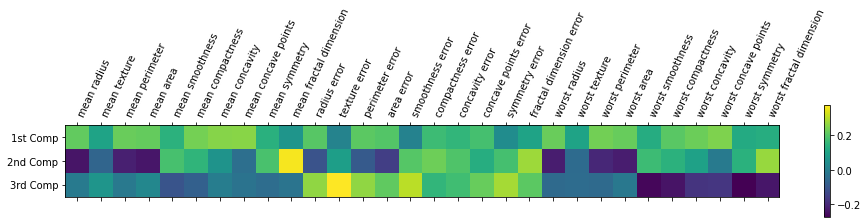

In [55]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'], fontsize=10)
plt.colorbar()
plt.xticks(range(len(dataset.feature_names)), dataset.feature_names, rotation=65,ha='left')
plt.tight_layout()
plt.show()